# Subtraction

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `Subtract`
An n-bit subtraction gate.

Implements $U|a\rangle|b\rangle \rightarrow |a\rangle|a-b\rangle$ using $4n - 4$ T gates.

This construction uses the relation `a - b = ~(~a + b)` to turn the operation into addition. This relation is used in
[Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization](https://arxiv.org/pdf/2007.07391)
to turn addition into subtraction conditioned on a qubit.

#### Parameters
 - `a_dtype`: Quantum datatype used to represent the integer a.
 - `b_dtype`: Quantum datatype used to represent the integer b. Must be large enough to hold the result in the output register of a - b, or else it simply drops the most significant bits. If not specified, b_dtype is set to a_dtype. 

#### Registers
 - `a`: A a_dtype.bitsize-sized input register (register a above).
 - `b`: A b_dtype.bitsize-sized input/output register (register b above). 

#### References
 - [Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization](https://arxiv.org/abs/2007.07391). Page 9.


In [2]:
from qualtran.bloqs.arithmetic import Subtract

### Example Instances

In [3]:
n = sympy.Symbol('n')
sub_symb = Subtract(QInt(bitsize=n))

In [4]:
sub_small = Subtract(QInt(bitsize=4))

In [5]:
sub_large = Subtract(QInt(bitsize=64))

In [6]:
sub_diff_size_regs = Subtract(QInt(bitsize=4), QInt(bitsize=16))

In [7]:
n = sympy.Symbol('n')
sub_symp_decomposition = Subtract(QInt(bitsize=n)).decompose_bloq()

#### Graphical Signature

In [8]:
from qualtran.drawing import show_bloqs
show_bloqs([sub_symb, sub_small, sub_large, sub_diff_size_regs, sub_symp_decomposition],
           ['`sub_symb`', '`sub_small`', '`sub_large`', '`sub_diff_size_regs`', '`sub_symp_decomposition`'])

### Call Graph

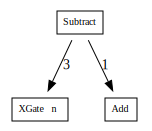

#### Counts totals:
 - `Add`: 1
 - `XGate⨂n`: 3

In [9]:
from qualtran.resource_counting.generalizers import ignore_split_join
sub_symb_g, sub_symb_sigma = sub_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(sub_symb_g)
show_counts_sigma(sub_symb_sigma)

## `SubtractFrom`
A version of `Subtract` that subtracts the first register from the second in place.

Implements $U|a
angle|b
angle
ightarrow |a
angle|b - a
angle$, essentially equivalent to
the statement `b -= a`.

#### Parameters
 - `dtype`: Quantum datatype used to represent the integers a, b, and b - a. 

#### Registers
 - `a`: A dtype.bitsize-sized input register (register a above).
 - `b`: A dtype.bitsize-sized input/output register (register b above).


In [10]:
from qualtran.bloqs.arithmetic import SubtractFrom

### Example Instances

In [11]:
n = sympy.Symbol('n')
sub_from_symb = SubtractFrom(QInt(bitsize=n))

In [12]:
sub_from_small = SubtractFrom(QInt(bitsize=4))

In [13]:
sub_from_large = SubtractFrom(QInt(bitsize=64))

#### Graphical Signature

In [14]:
from qualtran.drawing import show_bloqs
show_bloqs([sub_from_symb, sub_from_small, sub_from_large],
           ['`sub_from_symb`', '`sub_from_small`', '`sub_from_large`'])

### Call Graph

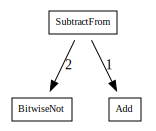

#### Counts totals:
 - `Add`: 1
 - `BitwiseNot`: 2

In [15]:
from qualtran.resource_counting.generalizers import ignore_split_join
sub_from_symb_g, sub_from_symb_sigma = sub_from_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(sub_from_symb_g)
show_counts_sigma(sub_from_symb_sigma)